In [1]:
import matplotlib.pyplot as plt 
import seaborn as sns 
import pandas as pd 
import numpy as np 
import os 

# Pilot 1. 기본 실험 

In [5]:
data_dir = '/Volume/VAD/LifeLongerAD/results/LANGCAD/MVTecAD/Baseline/seed_0/result.csv'
df = pd.read_csv(data_dir)

In [13]:
df.drop(columns = ['task','epoch','GT_class_name','epoch_time'])

,class_name,img_level_auroc,img_level_average_precision,pix_level_auroc,pix_level_average_precision
0,carpet,0.933387,0.967317,0.991966,0.748257
1,cable,0.715892,0.803905,0.945863,0.590726
2,zipper,0.988708,0.996962,0.975254,0.623961
3,wood,0.998246,0.999444,0.947683,0.583749
4,tile,0.876263,0.917751,0.962630,0.665531
5,metal_nut,0.848974,0.943716,0.954091,0.720300
6,transistor,0.705833,0.537846,0.940016,0.556361
7,bottle,0.996825,0.999008,0.984675,0.837560
8,leather,1.000000,1.000000,0.990355,0.449741
9,grid,0.982456,0.994665,0.974119,0.368064


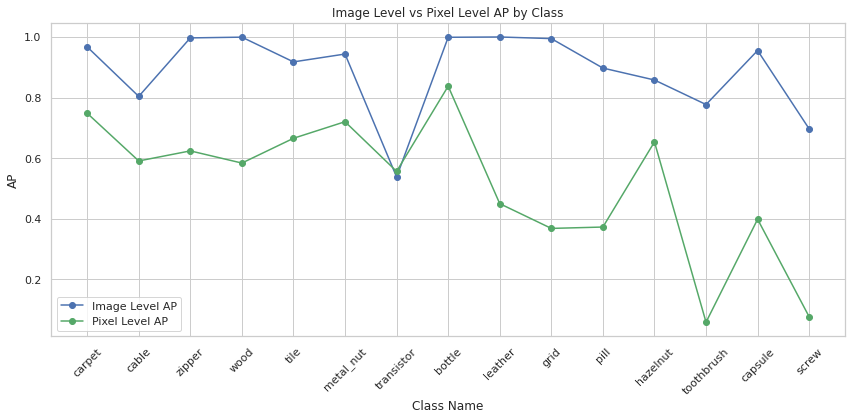

In [11]:
# 시각화 설정
sns.set(style="whitegrid")


# 5. 이미지 레벨과 픽셀 레벨 AUROC 비교 시각화
plt.figure(figsize=(12, 6))
plt.plot(df['class_name'], df['img_level_average_precision'], marker='o', label='Image Level AP', color='b')
plt.plot(df['class_name'], df['pix_level_average_precision'], marker='o', label='Pixel Level AP', color='g')
plt.title('Image Level vs Pixel Level AP by Class')
plt.xlabel('Class Name')
plt.ylabel('AP')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Pilot - 2. CViT 

In [8]:
df_dir = '/Volume/VAD/LifeLongerAD/results/LANGCAD/VISA/Baseline/seed_0/result.csv'
df = pd.read_csv(df_dir).round(3)
# Split the dataset into two parts: task-agnostic and task-specific
agnostic_df = df[df['class_name'] != df['GT_class_name']]
specific_df = df[df['class_name'] == df['GT_class_name']]
df['task-agnostic'] = ''
df.loc[::2,'task-agnostic'] = 'specific'
df.loc[1::2,'task-agnostic'] = 'agnostic'

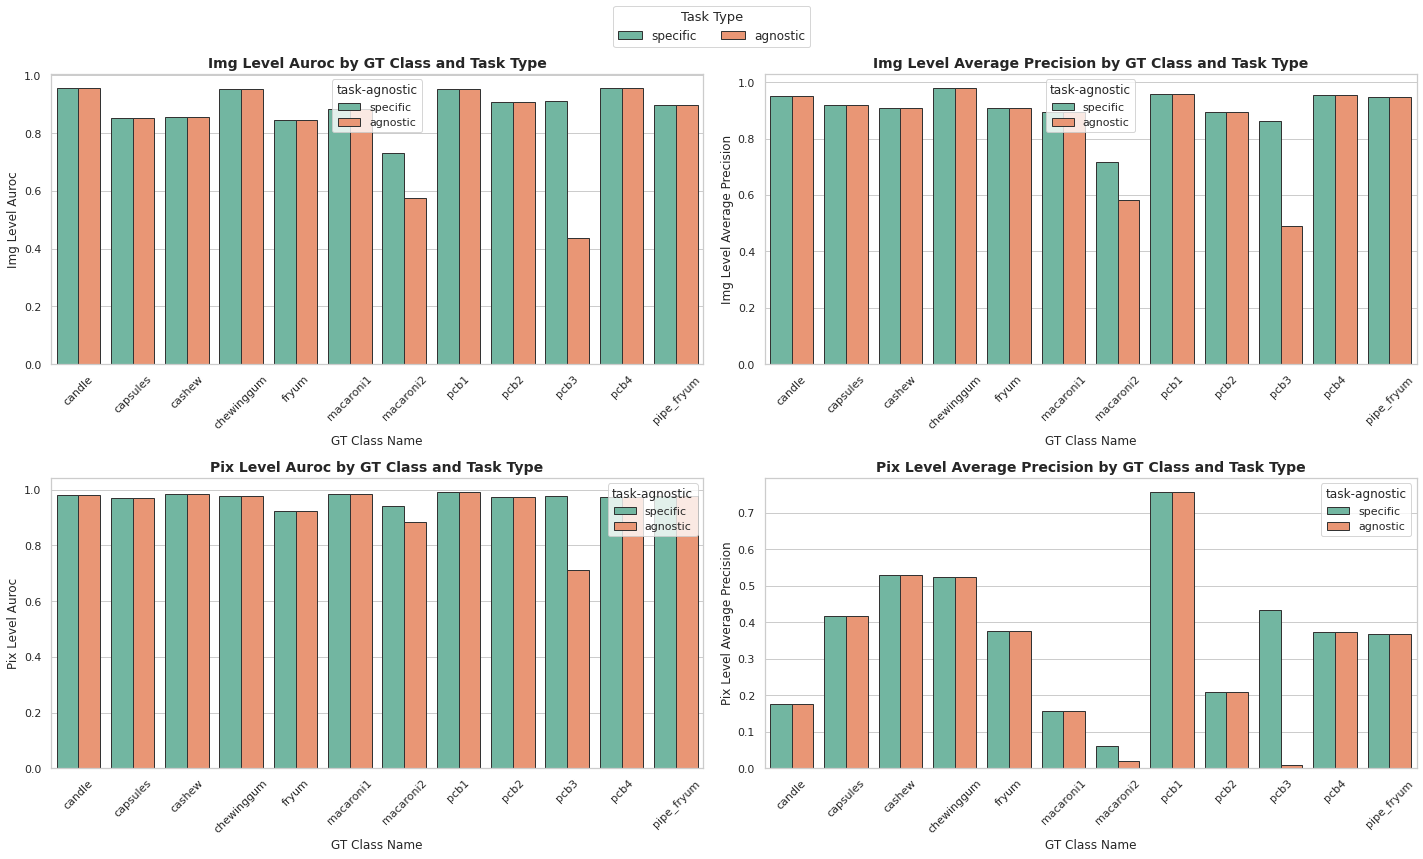

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# 스타일 설정
sns.set_theme(style="whitegrid")

# 데이터프레임을 df로 설정했다고 가정합니다.
metrics = ['img_level_auroc', 'img_level_average_precision', 'pix_level_auroc', 'pix_level_average_precision']

# 전체 플롯 설정: 플롯을 2x2 형태로 나누어 생성합니다.
fig, axes = plt.subplots(2, 2, figsize=(20, 12))
axes = axes.flatten()  # 쉽게 반복문을 돌리기 위해 배열을 평평하게 만듭니다.

# 각 메트릭에 대해 서브플롯 그리기
for i, metric in enumerate(metrics):
    sns.barplot(
        x='GT_class_name',
        y=metric,
        hue='task-agnostic',
        data=df,
        palette='Set2',  # 색상 팔레트 설정
        edgecolor=".2",
        ax=axes[i]  # 각 서브플롯에 대해 특정 축을 지정
    )
    # 각 서브플롯의 제목과 레이블 추가
    axes[i].set_title(f'{metric.replace("_", " ").title()} by GT Class and Task Type', fontsize=14, weight='bold')
    axes[i].set_xlabel('GT Class Name', fontsize=12)
    axes[i].set_ylabel(metric.replace("_", " ").title(), fontsize=12)
    axes[i].tick_params(axis='x', rotation=45)

# 범례는 모든 서브플롯에서 공유하도록 설정
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, title='Task Type', title_fontsize='13', fontsize='12', loc='upper center', ncol=2)

# 그래프 레이아웃 조정
plt.tight_layout(rect=[0, 0, 1, 0.95])  # 범례 공간을 확보하기 위해 그래프 크기를 조금 줄임
plt.show()


# Pilot 2-1 grid 먼저 CViT 

In [36]:
df_dir = '/Volume/VAD/LifeLongerAD/results/LANGCAD/MVTecAD/MVTecAD_VisA_mix/seed_0/result.csv'
df = pd.read_csv(df_dir).round(3)
# Split the dataset into two parts: task-agnostic and task-specific
agnostic_df = df[df['class_name'] != df['GT_class_name']]
specific_df = df[df['class_name'] == df['GT_class_name']]
df['task-agnostic'] = ''
df.loc[::2,'task-agnostic'] = 'specific'
df.loc[1::2,'task-agnostic'] = 'agnostic'

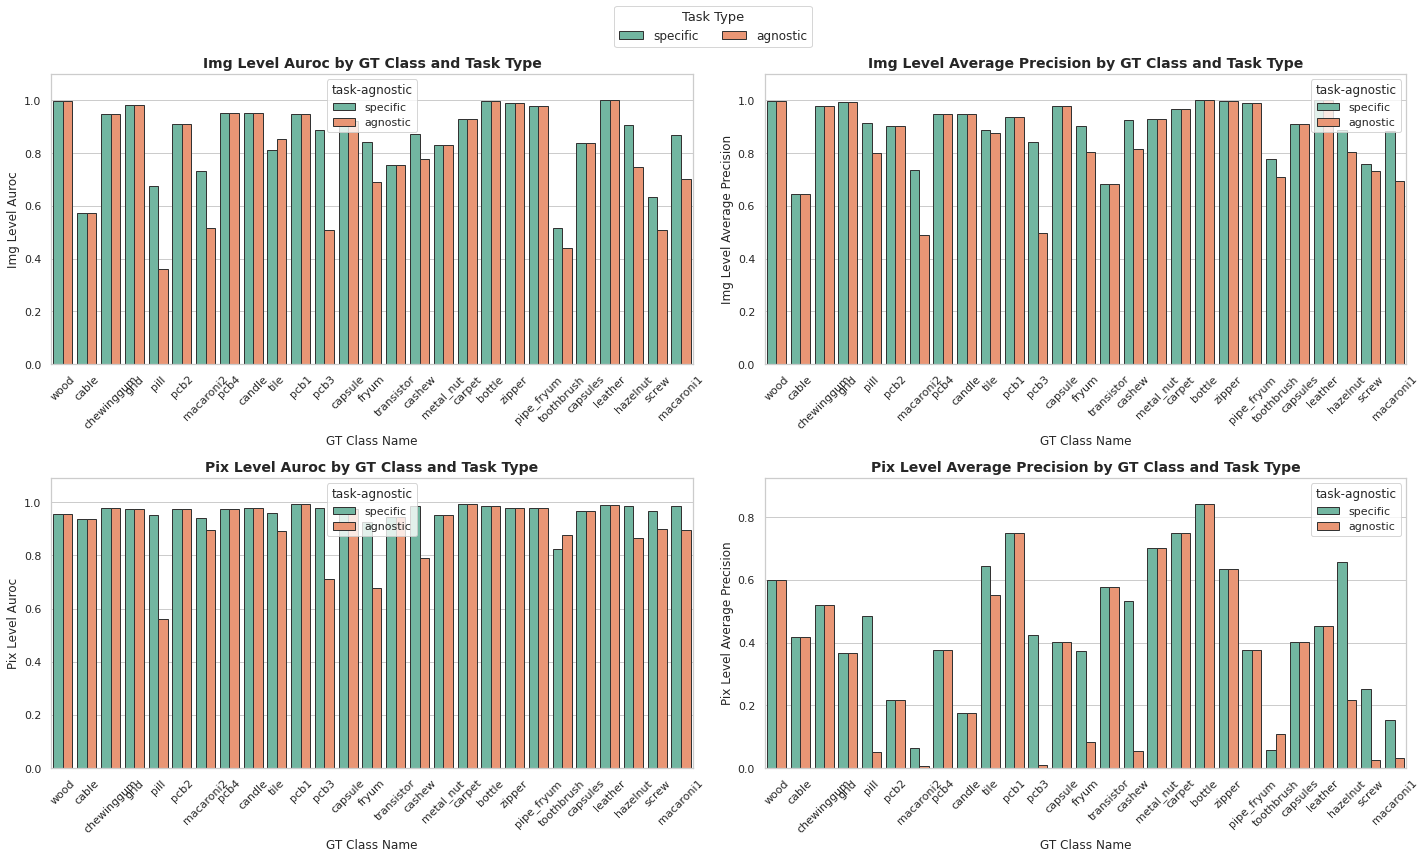

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# 스타일 설정
sns.set_theme(style="whitegrid")

# 데이터프레임을 df로 설정했다고 가정합니다.
metrics = ['img_level_auroc', 'img_level_average_precision', 'pix_level_auroc', 'pix_level_average_precision']

# 전체 플롯 설정: 플롯을 2x2 형태로 나누어 생성합니다.
fig, axes = plt.subplots(2, 2, figsize=(20, 12))
axes = axes.flatten()  # 쉽게 반복문을 돌리기 위해 배열을 평평하게 만듭니다.

# 각 메트릭에 대해 서브플롯 그리기
for i, metric in enumerate(metrics):
    sns.barplot(
        x='GT_class_name',
        y=metric,
        hue='task-agnostic',
        data=df,
        palette='Set2',  # 색상 팔레트 설정
        edgecolor=".2",
        ax=axes[i]  # 각 서브플롯에 대해 특정 축을 지정
    )
    # 각 서브플롯의 제목과 레이블 추가
    axes[i].set_title(f'{metric.replace("_", " ").title()} by GT Class and Task Type', fontsize=14, weight='bold')
    axes[i].set_xlabel('GT Class Name', fontsize=12)
    axes[i].set_ylabel(metric.replace("_", " ").title(), fontsize=12)
    axes[i].tick_params(axis='x', rotation=45)
    
    # y축의 상한을 기존 최대값보다 조금 더 여유롭게 설정
    y_max = df[metric].max() * 1.1  # 최대값의 110%로 설정하여 여유를 줌
    axes[i].set_ylim(0, y_max)

# 범례는 모든 서브플롯에서 공유하도록 설정
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, title='Task Type', title_fontsize='13', fontsize='12', loc='upper center', ncol=2)

# 그래프 레이아웃 조정
plt.tight_layout(rect=[0, 0, 1, 0.95])  # 범례 공간을 확보하기 위해 그래프 크기를 조금 줄임
plt.show()


In [26]:
# MVTecAD 'capsule hazelnut transistor cable bottle carpet grid leather metal_nut pill screw tile toothbrush wood zipper'
# VISA  'candle capsules cashew chewinggum fryum macaroni1 macaroni2 pcb1 pcb2 pcb3 pcb4 pipe_fryum'


a = 'capsule hazelnut transistor cable bottle carpet grid leather metal_nut pill screw tile toothbrush wood zipper candle capsules cashew chewinggum fryum macaroni1 macaroni2 pcb1 pcb2 pcb3 pcb4 pipe_fryum'.split(' ')
np.random.shuffle(a)

In [31]:
mvtec = 'capsule hazelnut transistor cable bottle carpet grid leather metal_nut pill screw tile toothbrush wood zipper'.split(' ')
visa = 'candle capsules cashew chewinggum fryum macaroni1 macaroni2 pcb1 pcb2 pcb3 pcb4 pipe_fryum'.split(' ')

In [34]:
dataset = {}

for cn in class_names:
    if cn in mvtec:
        dataset[cn] = 'MVTecAD'
    elif cn in visa:
        dataset[cn] = 'VISA'

In [35]:
dataset

{'wood': 'MVTecAD',
 'cable': 'MVTecAD',
 'chewinggum': 'VISA',
 'grid': 'MVTecAD',
 'pill': 'MVTecAD',
 'pcb2': 'VISA',
 'macaroni2': 'VISA',
 'pcb4': 'VISA',
 'candle': 'VISA',
 'tile': 'MVTecAD',
 'pcb1': 'VISA',
 'pcb3': 'VISA',
 'capsule': 'MVTecAD',
 'fryum': 'VISA',
 'transistor': 'MVTecAD',
 'cashew': 'VISA',
 'metal_nut': 'MVTecAD',
 'carpet': 'MVTecAD',
 'bottle': 'MVTecAD',
 'zipper': 'MVTecAD',
 'pipe_fryum': 'VISA',
 'toothbrush': 'MVTecAD',
 'capsules': 'VISA',
 'leather': 'MVTecAD',
 'hazelnut': 'MVTecAD',
 'screw': 'MVTecAD',
 'macaroni1': 'VISA'}